<a href="https://colab.research.google.com/github/verdwis/IR-Index-Compression/blob/main/Index_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import library

In [3]:
import heapq
import math
from collections import defaultdict, OrderedDict
import pydot
from itertools import count
import json
import struct
import pandas as pd
import re
from IPython.display import Image

# Membaca File Teks

In [4]:
with open("/content/drive/MyDrive/Semester 4/STBI/tugas 2/test.txt", 'r') as myfile:
    s2 = myfile.read().replace('\n', ' ')
    pattern = re.compile('[^\sa-zA-Z]')
    s2 = pattern.sub('',s2)

# Menggunakan Fixed Width

Fungsi untuk membuat dictionary dan menghitung jumlah bit yang digunakan dengan dictionary tersebut

In [ ]:
def get_dictionary(s):
    d = {}

    
    s = list(filter(None, s.split(" ")))
    # Generating Key-Value pair for entire string
    for i in s:
        if i not in d.keys():
            d[i] = 1
        else:
            d[i] = d[i] + 1
    return d

def get_bit_used(dict) :
  byte = 0
  for key, value in dict.items() : 
    return len(str(dict).encode('utf-8'))*8


In [ ]:
#Menampilkan Dictionary
term_dict = get_dictionary(s2) 
print(term_dict)
num_bits = get_bit_used(term_dict)
print("Number of bit used : {}".format(num_bits))

{'First': 1, 'line': 3, 'This': 2, 'is': 2, 'a': 1, 'test': 1, 'file': 1, 'second': 1, 'third': 1, 'and': 2, 'subsiquent': 1, 'lines': 1, 'more': 1}
Number of bit used : 1184


In [ ]:
# Define an index of key-value pairs
index = term_dict

# Define the format string for each record
format_str = '<20s20s'

# Open a file for writing the compressed index
with open('compressed_index.bin', 'wb') as f:
    for key, value in index.items():
        # Pack the key-value pair into a binary string
        record = struct.pack(format_str, key.encode('utf-8'), str(value).encode('utf-8'))
        # Write the binary string to the file
        f.write(record)

# Open the compressed index file for reading
with open('compressed_index.bin', 'rb') as f:
    compressed_index = {}
    # Read the binary string from the file and unpack it into key-value pairs
    while True:
        record = f.read(struct.calcsize(format_str))
        if not record:
            break
        key, value = struct.unpack(format_str, record)
        #Add the key-value pair to the uncompressed index
        compressed_index[key.decode('utf-8')] = value.decode('utf-8')

# Print the uncompressed index
print(compressed_index)


{'First\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': '1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'line\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': '3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'This\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': '2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'is\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': '2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'a\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': '1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'test\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': '1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'file\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
def get_split_points(filename, skiprows=0, testrows=10, sep=' '):
    '''
    Find the column split points in a fixed width file
    '''
    with open(filename) as myfile:
        head = [next(myfile) for x in range(skiprows)]
        testset = [next(myfile) for x in range(testrows)]
        maxlength = len(max(testset , key = len))
        spacecounts = [0 for col in range(maxlength)]
        for string in testset:
            for i in range(len(string)):
                if string[i] == sep:
                    spacecounts[i] += 1
        indices = [i for i, x in enumerate(spacecounts) if x == testrows]
        split_points = [0] + [x for x in indices if x-1 not in indices and x > 0 ]
        return split_points

# Menggunakan Dictionary as a string

Fungsi untuk melakukan kompresi pada string dan menghitung jumlah byte

In [ ]:
def string_compression(s):
    d = get_dictionary(s)
    x = []

    # Copying Key Value Pairs in a list
    for key,value in d.items():
        x.append(key)
        x.append(value)

    # Printing a Cocktail list of Strings and Integers
    print(x)

    # Converting Integers in list x to Strings and Joining them
    for i in x[1::2]:
        x[i] = str(x[i])

    compression_result = ''.join(map(str, x))
    return compression_result

def get_bit_used(dict_str):
  return len(dict_str.encode('utf-8')*8)

Menampilkan hasil dictionary as a string

In [ ]:
# Hasil Kompresi
strdict = string_compression(s2) 
strdict

['First', 1, 'line', 3, 'This', 2, 'is', 2, 'a', 1, 'test', 1, 'file', 1, 'second', 1, 'third', 1, 'and', 2, 'subsiquent', 1, 'lines', 1, 'more', 1]


'First1line3This2is2a1test1file1second1third1and2subsiquent1lines1more1'

Menghitung jumlah bit yang digunakan

In [ ]:
print("Number of bit used : {}".format(get_bit_used(strdict)))

Number of bit used : 560


In [ ]:
# Define an index of key-value pairs
index = strdict

# Convert the index to a JSON string
index_str = json.dumps(index)

# Write the compressed index to a file
with open('compressed_index.json', 'w') as f:
    f.write(index_str)

# Read the compressed index from the file
with open('compressed_index.json', 'r') as f:
    compressed_index_str = f.read()

# Convert the compressed index back to a dictionary
compressed_index = json.loads(compressed_index_str)

# Print the uncompressed index
print(compressed_index)
#Menghitung jumlah bit
print(len(compressed_index.encode('utf-8')))


First1line3This2is2a1test1file1second1third1and2subsiquent1lines1more1
70


In [ ]:
def compress_index(index):
    """
    Compresses an index with dictionary as string using fixed-width encoding.
    """
    # Convert the index to a string format
    index_str = json.dumps(index)

    # Determine the maximum index string length
    max_length = len(index_str)

    # Calculate the number of bytes required to represent the maximum length
    num_bytes = (max_length.bit_length() + 7) // 8

    # Create a format string for packing and unpacking lengths
    length_format = f'>{num_bytes}s'

    # Pack the lengths and strings using fixed-width encoding
    compressed_index = {}
    for key, value in index.items():
        value = str(value)
        packed_length = struct.pack(length_format.encode(), len(value.encode()))
        packed_value = value.encode()
        compressed_index[key] = packed_length + packed_value

    return compressed_index
    
def decompress_index(compressed_index):
    """
    Decompresses an index with dictionary as string that was compressed using fixed-width encoding.
    """
    # Convert the index to a string format
    index_str = json.dumps(compressed_index)

    # Determine the maximum index string length
    max_length = len(index_str)

    # Calculate the number of bytes required to represent the maximum length
    num_bytes = (max_length.bit_length() + 7) // 8

    # Create a format string for packing and unpacking lengths
    length_format = f'>{num_bytes}s'
    # Unpack the lengths and strings using fixed-width encoding
    decompressed_index = {}
    for key, value in compressed_index.items():
        num_bytes = (len(value) - struct.calcsize(length_format))
        length = int.from_bytes(value[:num_bytes], 'big')
        index_str = str(value[num_bytes:]).encode()
        decompressed_index[key] = json.loads(index_str)

    return decompressed_index

# Huffman Encoding untuk file teks

Class untuk merepresentasikan Node  Huffman tree

In [ ]:
class node():
    _ids = count(0)
    def __init__(self, weight, symbol):
        self.node = pydot.Node(next(self._ids), label=symbol)
        graph.add_node(self.node)
        self.weight = weight
        self.symbol = symbol
        self.left = None
        self.right = None
        
    def addLeft(self, leftNode):
        graph.add_edge(pydot.Edge(self.node, leftNode.node, label='0'))
        self.left = leftNode
        
    def addRight(self, rightNode):
        graph.add_edge(pydot.Edge(self.node, rightNode.node, label='1'))
        self.right = rightNode 
    
    def __lt__(self,other):
        return self.weight < other.weight

Menentukan simbol encodings

In [ ]:
def getCodings(rootNode, currentEncoding):
    if( rootNode.left == None and rootNode.right == None):
        codings.append([rootNode.symbol, rootNode.weight, currentEncoding])
    if( rootNode.left != None):
        getCodings(rootNode.left, currentEncoding + '0')
    if( rootNode.right != None):
        getCodings(rootNode.right, currentEncoding + '1')

Fungsi untuk melakukan Huffman Compression

In [ ]:
def Huffman(str):
    #mendapatkan frequensi dari string asli 
    #(Mengestimatikan probabilitas symbol)
    str_list = str.split(" ")
    str_list = list(filter(None, str_list))
    frequencies = defaultdict(int)
    for ch in str_list:
      if ch != " " :
        frequencies[ch] += 1
    
    #create simbol node
    forest = []
    for ch, weight in frequencies.items():
        forest.append(node(weight, ch))
    heap = heapq.heapify(forest)
    
    #build tree dari node
    while len(forest) > 1:
        node1 = heapq.heappop(forest)
        node2 = heapq.heappop(forest)
        newNode = node(node1.weight + node2.weight, "")
        newNode.addLeft(node1)
        newNode.addRight(node2)
        heapq.heappush(forest, newNode)
    
    #cetak semua hasil compression 
    getCodings(forest[0], "")
    codings.sort(key=lambda x: -x[1])
    print("{: >15} {: >15} {: >15}".format("Symbol", "Weight", "Code"))
    unencodedBits = 0
    encodedBits = 0
    numBits = math.ceil( math.log(len(codings), 2) )
    for coding in codings:
        print("{: >15} {: >15} {: >15}".format(*coding))
        unencodedBits += coding[1] * numBits
        encodedBits += coding[1] * len(coding[2])
    print("Number of bits (uncompressed) = ", unencodedBits)
    print("Number of bits (compressed) = ", encodedBits)

Mengimplementasikan huffman decoding dalam menyimpan indeks.

         Symbol          Weight            Code
           line               3             111
             is               2             011
            and               2             101
           This               2            1101
           file               1            0000
           more               1            0001
              a               1            0010
          third               1            0011
          First               1            0100
     subsiquent               1            0101
           test               1            1000
          lines               1            1001
         second               1            1100
Number of bits (uncompressed) =  72
Number of bits (compressed) =  65


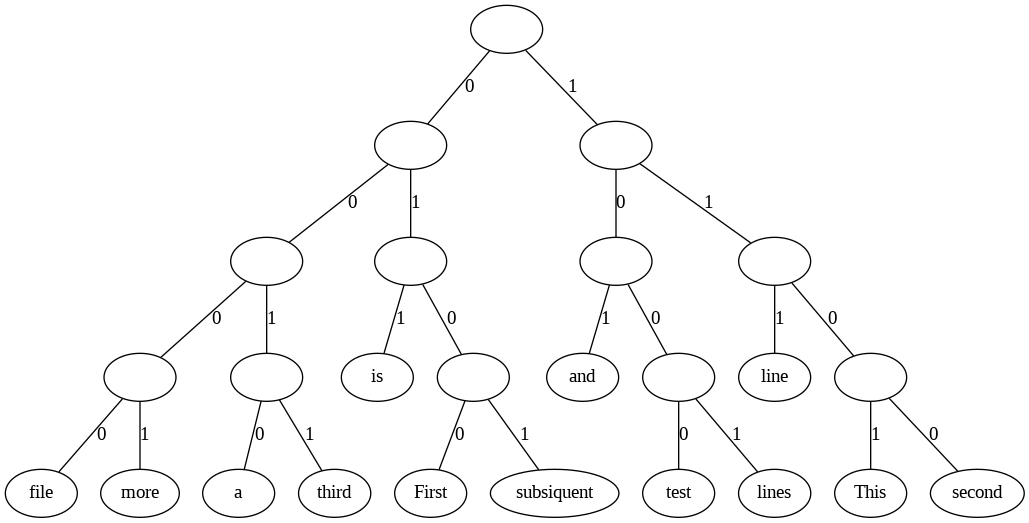

In [ ]:
graph = pydot.Dot(graph_type='graph')
codings = []



with open("/content/drive/Shareddrives/Temu Kembali/test.txt", 'r') as myfile:
    s2 = myfile.read().replace('\n', ' ')
    pattern = re.compile('[^\sa-zA-Z]')
    s2 = pattern.sub('',s2)

Huffman(s2)
graph.write_png("stbi.png")
Image(filename='stbi.png')